In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from PIL import Image
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file chooser dialog


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content/archive")


In [ ]:
TRAIN_DIR = "/content/archive/train/train/"
TEST_DIR = "/content/archive/test/test/"


In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
surprise Completed
neutral Completed
happy Completed
sad Completed
disgust Completed
fear Completed


,image,label
0,/content/archive/train/train/fear/Training_674...,fear
1,/content/archive/train/train/angry/Training_71...,angry
2,/content/archive/train/train/surprise/Training...,surprise
3,/content/archive/train/train/sad/Training_7278...,sad
4,/content/archive/train/train/sad/Training_9659...,sad


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
surprise Completed
neutral Completed
happy Completed
sad Completed
disgust Completed
fear Completed


,image,label
0,/content/archive/test/test/angry/PublicTest_84...,angry
1,/content/archive/test/test/angry/PrivateTest_1...,angry
2,/content/archive/test/test/angry/PrivateTest_5...,angry
3,/content/archive/test/test/angry/PublicTest_88...,angry
4,/content/archive/test/test/angry/PrivateTest_5...,angry


<Axes: xlabel='count', ylabel='label'>

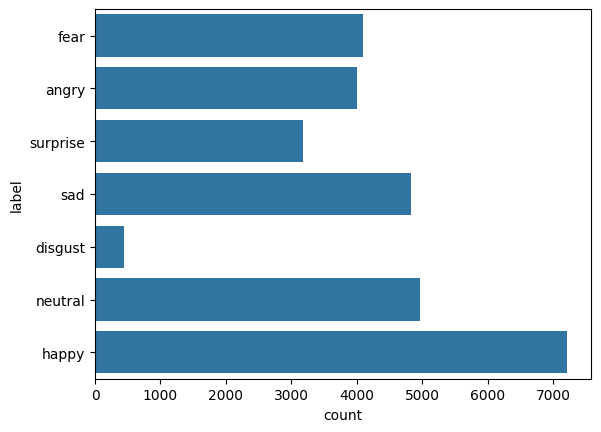

In [ ]:
sns.countplot(train['label'])

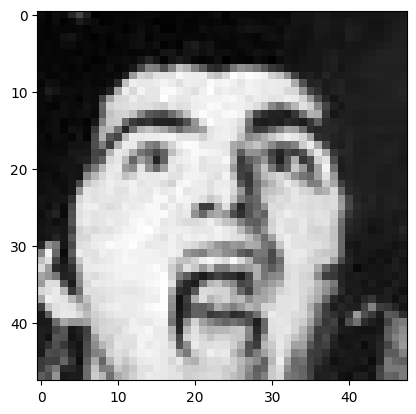

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

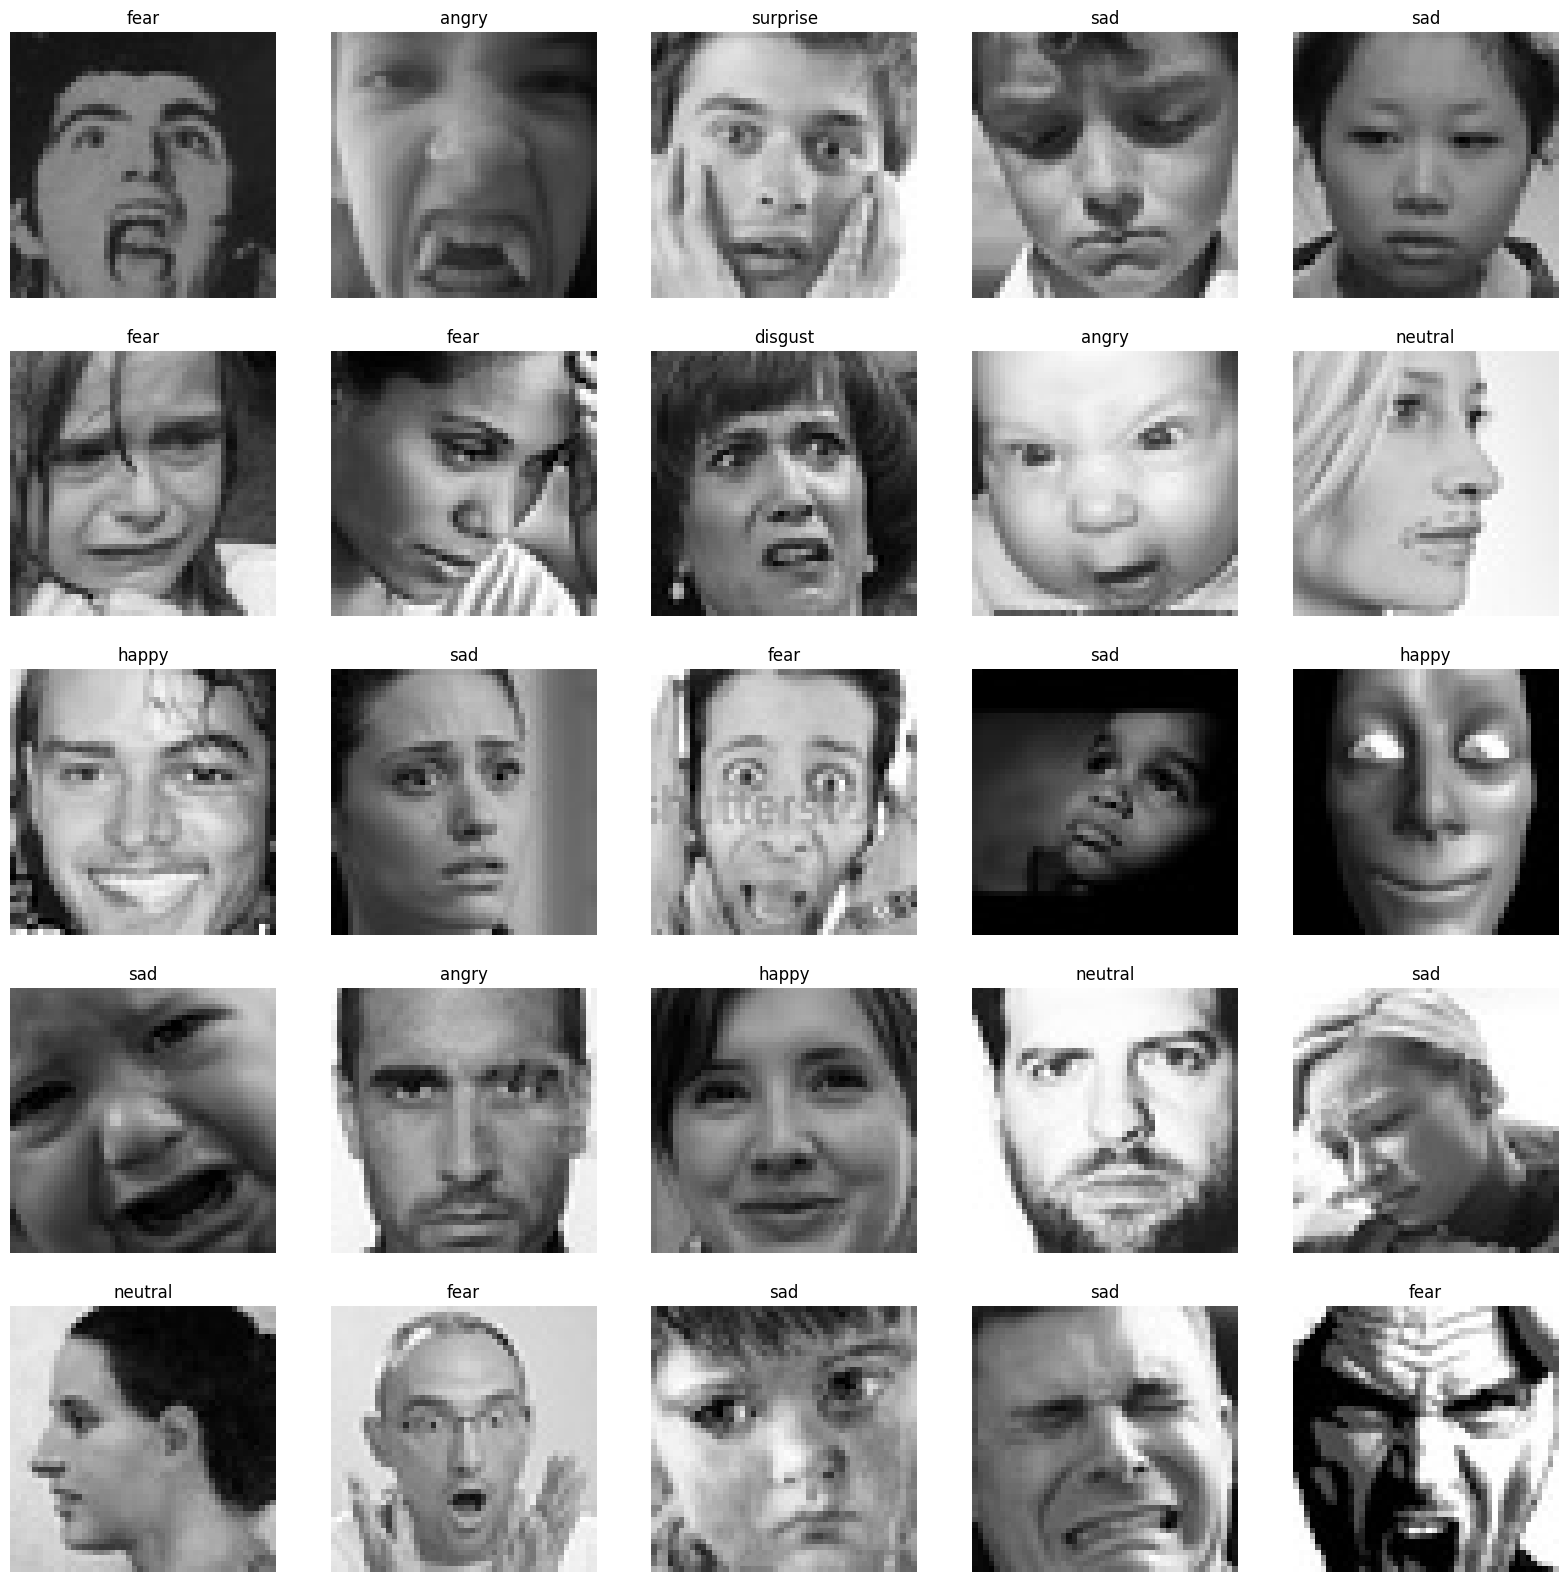

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.convert('L')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.2361 - loss: 1.8355 - val_accuracy: 0.2471 - val_loss: 1.8172
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.2562 - loss: 1.8142 - val_accuracy: 0.2561 - val_loss: 1.7966
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.2517 - loss: 1.7992 - val_accuracy: 0.3008 - val_loss: 1.7159
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2913 - loss: 1.7261 - val_accuracy: 0.3410 - val_loss: 1.6475
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3453 - loss: 1.6479 - val_accuracy: 0.4163 - val_loss: 1.4936
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.3901 - loss: 1.5525 - val_accuracy: 0.4507 - val_loss: 1.4278
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4218 - loss: 1.4976 - val_accuracy: 0.4727 - val_loss: 1.3521
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.4418 - loss: 1

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()